<a href="https://colab.research.google.com/github/kingofnonames/Machine-Learning---IT3190/blob/MLP/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np

# Load dữ liệu từ processed_data.h5
with h5py.File("/content/drive/MyDrive/processed_h5/processed_data.h5", "r") as hf:
    X = hf["X"][:]  # Dùng [:] để lấy toàn bộ dữ liệu
    y = hf["y"][:]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7000, 16640)
y shape: (7000,)


In [9]:
from sklearn.model_selection import train_test_split

# Chia Train và Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Chia Temp thành Validation và Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (5600, 16640) (5600,)
Validation: (700, 16640) (700,)
Test: (700, 16640) (700,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(16640,)),

    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.4),

    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(7, activation="softmax")  # 7 lớp nhạc cụ
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1024)           │    17,040,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,730,311 (67.64 MB)

 Trainable params: 17,730,311 (67.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)


Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 61s 337ms/step - accuracy: 0.4237 - loss: 3.4085 - val_accuracy: 0.7029 - val_loss: 0.7948
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - accuracy: 0.6358 - loss: 1.1845 - val_accuracy: 0.7414 - val_loss: 0.7255
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 82s 343ms/step - accuracy: 0.7458 - loss: 0.7975 - val_accuracy: 0.7929 - val_loss: 0.6195
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 91s 392ms/step - accuracy: 0.7960 - loss: 0.6512 - val_accuracy: 0.8257 - val_loss: 0.5584
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 75s 350ms/step - accuracy: 0.8139 - loss: 0.5730 - val_accuracy: 0.8414 - val_loss: 0.5314
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 62s 352ms/step - accuracy: 0.8450 - loss: 0.5067 - val_accuracy: 0.8400 - val_loss: 0.5446
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 81s 348ms/step - accuracy: 0.8582 - loss: 0.4500 - val_accuracy: 0.8600 - val_loss: 0.5198
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 61s 346ms/step - accuracy: 0.8824 - loss: 0

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(7, activation='softmax')  # 7 nhãn
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - accuracy: 0.5598 - loss: 1.2931 - val_accuracy: 0.7171 - val_loss: 1.0441
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.8201 - loss: 0.5341 - val_accuracy: 0.8457 - val_loss: 0.4775
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.8728 - loss: 0.3759 - val_accuracy: 0.8800 - val_loss: 0.3749
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9056 - loss: 0.2809 - val_accuracy: 0.8786 - val_loss: 0.3589
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.9284 - loss: 0.2088 - val_accuracy: 0.8757 - val_loss: 0.4147
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.9384 - loss: 0.1876 - val_accuracy: 0.9029 - val_loss: 0.3400
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.9427 - loss: 0.1655 - val_accuracy: 0.8886 - val_loss: 0.3543
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9534 - loss: 0.1523 - val_accu

In [15]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True,
    monitor='val_accuracy',
    verbose=1
)


In [16]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc:.4f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8876 - loss: 0.4643
Test accuracy: 0.8929


In [17]:
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [18]:
wrong_idx = np.where(y_pred_labels != y_test)[0]
print("Số mẫu bị gắn nhãn sai:", len(wrong_idx))


Số mẫu bị gắn nhãn sai: 75


In [21]:
for i in wrong_idx[:100]:  # in mẫu đầu tiên bị sai
    print(f"Mẫu {i} | Dự đoán: {y_pred_labels[i]} | Nhãn thật: {y_test[i]}")



Mẫu 0 | Dự đoán: 5 | Nhãn thật: 2
Mẫu 6 | Dự đoán: 4 | Nhãn thật: 3
Mẫu 10 | Dự đoán: 0 | Nhãn thật: 5
Mẫu 12 | Dự đoán: 0 | Nhãn thật: 1
Mẫu 19 | Dự đoán: 4 | Nhãn thật: 3
Mẫu 33 | Dự đoán: 4 | Nhãn thật: 2
Mẫu 45 | Dự đoán: 0 | Nhãn thật: 5
Mẫu 51 | Dự đoán: 0 | Nhãn thật: 1
Mẫu 70 | Dự đoán: 6 | Nhãn thật: 3
Mẫu 74 | Dự đoán: 1 | Nhãn thật: 2
Mẫu 107 | Dự đoán: 0 | Nhãn thật: 3
Mẫu 119 | Dự đoán: 5 | Nhãn thật: 2
Mẫu 129 | Dự đoán: 6 | Nhãn thật: 0
Mẫu 131 | Dự đoán: 4 | Nhãn thật: 3
Mẫu 136 | Dự đoán: 4 | Nhãn thật: 0
Mẫu 140 | Dự đoán: 2 | Nhãn thật: 3
Mẫu 162 | Dự đoán: 0 | Nhãn thật: 1
Mẫu 167 | Dự đoán: 6 | Nhãn thật: 3
Mẫu 171 | Dự đoán: 2 | Nhãn thật: 4
Mẫu 172 | Dự đoán: 0 | Nhãn thật: 3
Mẫu 178 | Dự đoán: 3 | Nhãn thật: 6
Mẫu 182 | Dự đoán: 4 | Nhãn thật: 2
Mẫu 192 | Dự đoán: 1 | Nhãn thật: 3
Mẫu 196 | Dự đoán: 5 | Nhãn thật: 3
Mẫu 216 | Dự đoán: 1 | Nhãn thật: 0
Mẫu 220 | Dự đoán: 0 | Nhãn thật: 1
Mẫu 239 | Dự đoán: 1 | Nhãn thật: 0
Mẫu 246 | Dự đoán: 0 | Nhãn thật: 1
Mẫu 

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


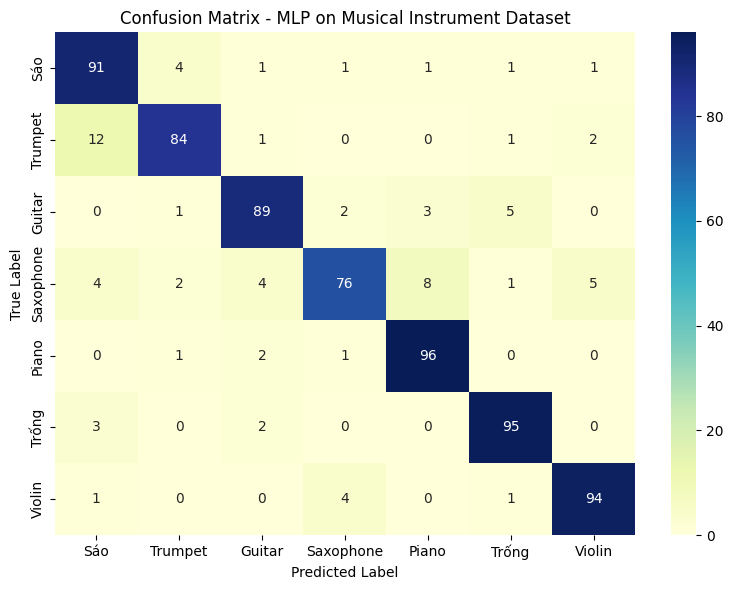

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dự đoán nhãn từ mô hình đã huấn luyện
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)  # Lấy nhãn dự đoán

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
class_names = ['Sáo', 'Trumpet', 'Guitar', 'Saxophone', 'Piano', 'Trống', 'Violin']

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP on Musical Instrument Dataset')
plt.tight_layout()
plt.show()


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test  # Gán đúng tên như bạn yêu cầu

print(f"Accuracy: {accuracy_score(y_true_classes, y_pred_classes):.3f}")
print(f"Precision: {precision_score(y_true_classes, y_pred_classes, average='macro'):.3f}")
print(f"Recall: {recall_score(y_true_classes, y_pred_classes, average='macro'):.3f}")
print(f"F1: {f1_score(y_true_classes, y_pred_classes, average='macro'):.3f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Accuracy: 0.893
Precision: 0.894
Recall: 0.893
F1: 0.892


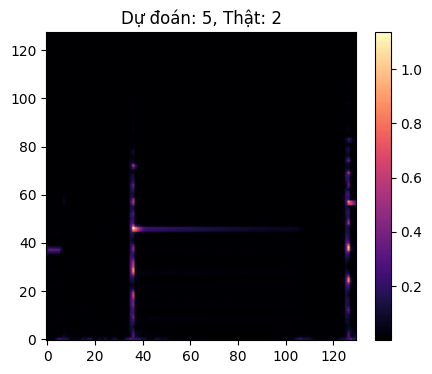

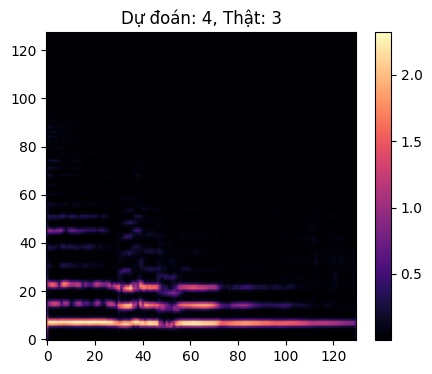

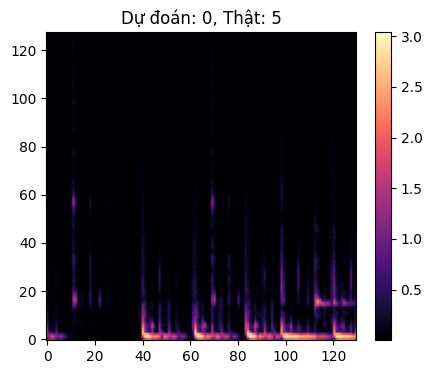

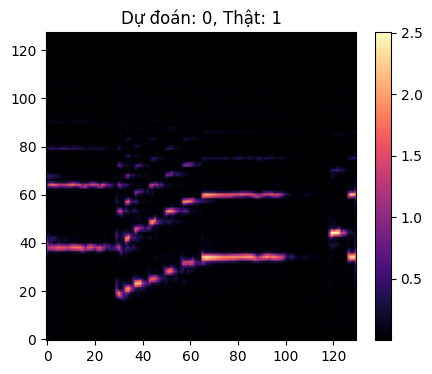

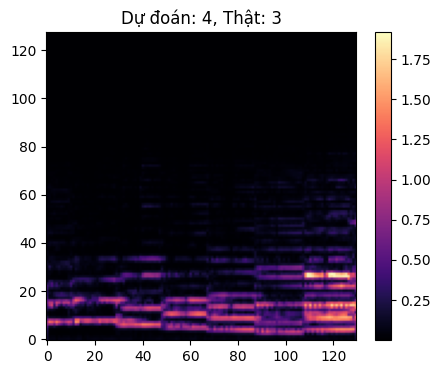

In [20]:
import matplotlib.pyplot as plt

for i in wrong_idx[:5]:  # Hiển thị 5 mẫu sai
    plt.figure(figsize=(5, 4))
    plt.imshow(X_test[i].reshape(128, 130), aspect='auto', origin='lower', cmap='magma')
    plt.title(f"Dự đoán: {y_pred_labels[i]}, Thật: {y_test[i]}")
    plt.colorbar()
    plt.show()


| Nguyên nhân                       | Giải thích                                                             |
| --------------------------------- | ---------------------------------------------------------------------- |
| **Dữ liệu chồng chéo**            | Các nhạc cụ có phổ tần giống nhau, dễ nhầm lẫn (vd: violin và guitar). |
| **Chưa đủ phức tạp**              | MLP đơn giản chưa đủ sức phân biệt các lớp có biểu diễn gần nhau.      |
| **Overfitting hoặc Underfitting** | Nếu model quá đơn giản hoặc train chưa đủ tốt.                         |
| **Số lượng dữ liệu nhỏ**          | Chỉ 1000 mẫu/lớp, có thể chưa đủ đa dạng hóa âm thanh.                 |
| **Noise trong dữ liệu**           | Một số mẫu bị méo tiếng, sai nhãn, hoặc không rõ ràng.                 |
